In [3]:
import numpy as np
import heartpy as hp
import matplotlib.pyplot as plt
import pandas as pd

In [132]:
df = pd.read_csv('heart_dataset/abbu/sleep/4.csv')

In [46]:
data = df.values[100:,1]

In [47]:
print(data.shape)
print(data)

(1697,)
[2131466 2133556 2135309 ... 2118659 2120060 2121408]


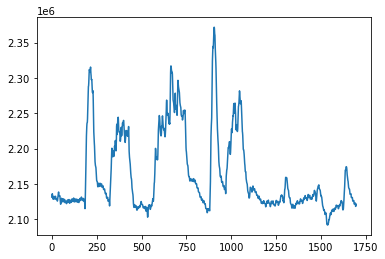

In [48]:
plt.plot(data)
plt.show()

In [140]:
sample_rate = 10.00

In [50]:
filtered = hp.filter_signal(data, [0.5, 4.00], sample_rate=sample_rate, order=3, filtertype='bandpass')

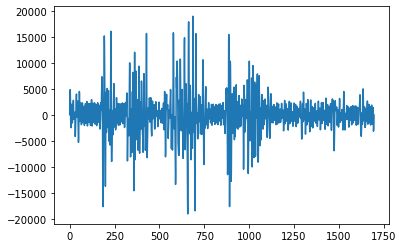

In [51]:
plt.plot(filtered)
plt.show()

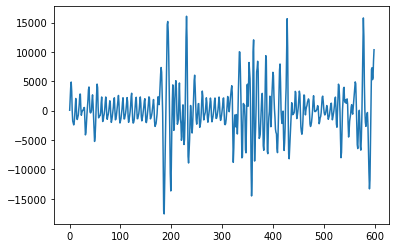

In [52]:
plt.plot(filtered[0:int(sample_rate * 60)])
plt.show()

In [53]:
#let's resample to ~30Hz as well
#10Hz is low for the adaptive threshold analysis HeartPy uses
from scipy.signal import resample

resampled = resample(filtered, len(filtered) * 3)

#don't forget to compute the new sampling rate
new_sample_rate = sample_rate * 3

C:\Python38\lib\site-packages\heartpy\visualizeutils.py:119: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


bpm: 73.314607
ibi: 818.390805
sdnn: 104.528207
sdsd: 88.139634
rmssd: 108.711461
pnn20: 0.681818
pnn50: 0.454545
hr_mad: 33.333333
sd1: 75.787873
sd2: 100.160569
s: 23847.693030
sd1/sd2: 0.756664
breathingrate: 0.126460


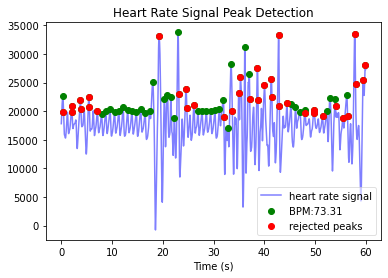

In [54]:
wd, m = hp.process(resampled[0:int(new_sample_rate * 60)], sample_rate = new_sample_rate)
hp.plotter(wd, m)
for measure in m.keys():
    print('%s: %f' %(measure, m[measure]))

[3769.1948356512416, 29011.796519821037, 66628.24145828551, 40645.71210860502, 45669.363246503664, 37497.23889335187, 26790.225065564486, 50057.211822557605, 57022.56465378947, 70292.16423521117, 44029.34480251096, 8337.599022236558, 4864.297656712632, 12381.036623465745, 5840.493559657437, 9421.200723347318]


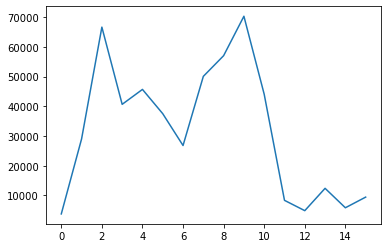

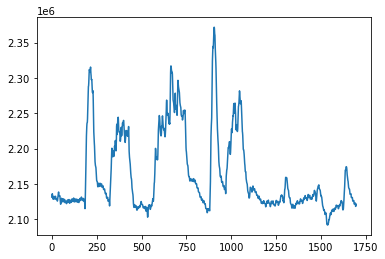

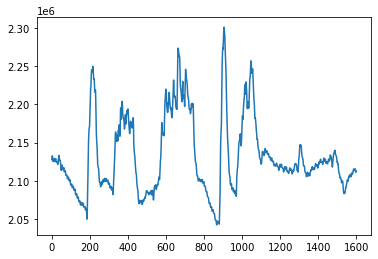

In [57]:
import sys

raw = df.values[100:, 1]
windowsize = 100
std = []

for i in range(len(raw) // windowsize):
    start = i * windowsize
    end = (i + 1) * windowsize
    sliced = raw[start:end]
    try:
        std.append(np.std(sliced))
    except:
        print(i)

print(std)
plt.plot(std)
plt.show()

plt.plot(raw)
plt.show()

plt.plot(raw[0:(len(raw) // windowsize) * windowsize] - resample(std, len(std)*windowsize))
plt.show()

Range  0 : 
Start : 0
End : 100
Rejected!


Range  1 : 
Start : 100
End : 200
Accepted!


Range  2 : 
Start : 200
End : 300
Accepted!


Range  3 : 
Start : 300
End : 400
Accepted!


Range  4 : 
Start : 400
End : 500
Accepted!


Range  5 : 
Start : 500
End : 600
Accepted!


Range  6 : 
Start : 600
End : 700
Accepted!


Range  7 : 
Start : 700
End : 800
Accepted!


Range  8 : 
Start : 800
End : 900
Accepted!


Range  9 : 
Start : 900
End : 1000
Accepted!


Range  10 : 
Start : 1000
End : 1100
Accepted!


Range  11 : 
Start : 1100
End : 1200
Accepted!


Range  12 : 
Start : 1200
End : 1300
Accepted!


Range  13 : 
Start : 1300
End : 1400
Accepted!


Range  14 : 
Start : 1400
End : 1500
Accepted!


Range  15 : 
Start : 1500
End : 1600
Accepted!


Range  16 : 
Start : 1600
End : 1700
Accepted!




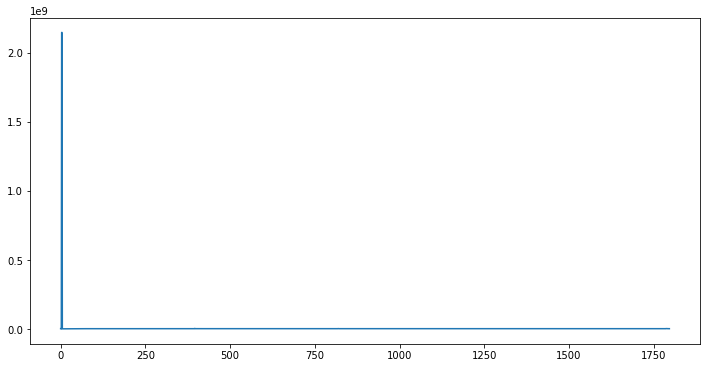

'plt.figure(figsize=(12,6))\nplt.plot(filtered)\nplt.show()'

In [141]:
raw = df.values[:, 1]

mx = np.max(raw)
mn = np.min(raw)
global_range = mx - mn

windowsize = 100
#filtered = []
final_filtered_data = []

for i in range(len(raw) // windowsize):
    start = i * windowsize
    end = (i + 1) * windowsize
    sliced = raw[start:end]
    rng = np.max(sliced) - np.min(sliced)
    print('Range ', i, ': ')
    print('Start :', start)
    print('End :', end)
    if ((rng >= (0.5 * global_range)) 
        or 
        (np.max(sliced) >= 0.9 * mx) 
        or 
        (np.min(sliced) <= mn + (0.1 * mn))):
        
        print('Rejected!')
        #for x in sliced:
        #    filtered.append(0)
    else:
        print('Accepted!')
        filtered = []
        for x in sliced:
            filtered.append(x)
        final_filtered_data.append(filtered)
    #filtered.clear()
    print('\n')

plt.figure(figsize=(12,6))
plt.plot(raw)
plt.show()

'''plt.figure(figsize=(12,6))
plt.plot(filtered)
plt.show()'''

In [142]:
print(len(final_filtered_data))
print(final_filtered_data)

16
[[2179426, 2179325, 2177476, 2176216, 2176374, 2176960, 2176314, 2176431, 2177163, 2176387, 2176139, 2176322, 2174757, 2174670, 2176637, 2179114, 2181403, 2184071, 2186679, 2188582, 2188897, 2189044, 2187755, 2187200, 2187000, 2186859, 2188135, 2189713, 2189726, 2189184, 2188812, 2187358, 2184970, 2183542, 2182947, 2181901, 2181490, 2181295, 2180740, 2180576, 2180724, 2179569, 2178202, 2178218, 2179003, 2178454, 2178513, 2179339, 2179927, 2179663, 2180896, 2181376, 2181764, 2183205, 2184406, 2185674, 2187943, 2190686, 2192494, 2192512, 2192465, 2190222, 2188595, 2187253, 2186137, 2185273, 2184722, 2184081, 2183739, 2183655, 2182402, 2180462, 2179658, 2180099, 2179348, 2178925, 2179103, 2178752, 2178121, 2178265, 2177038, 2175914, 2177228, 2179459, 2181333, 2183560, 2185956, 2187480, 2187679, 2187729, 2186011, 2185313, 2184915, 2184788, 2186026, 2187995, 2188463, 2187890, 2187254, 2184980], [2182131, 2180591, 2179406, 2178545, 2178000, 2177655, 2176959, 2176607, 2176590, 2174611, 217

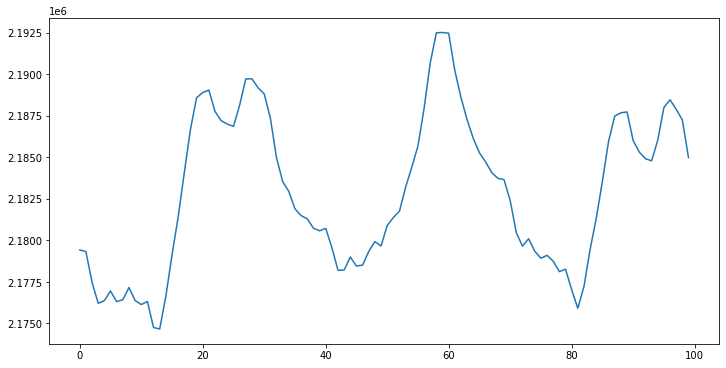

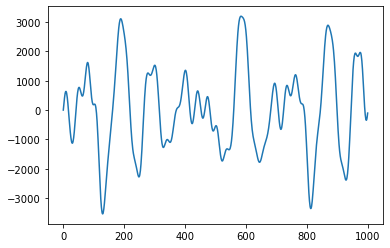

C:\Python38\lib\site-packages\numpy\core\fromnumeric.py:3334: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Python38\lib\site-packages\numpy\core\_methods.py:216: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Python38\lib\site-packages\numpy\ma\core.py:5215: RuntimeWarning: Mean of empty slice.
  result = super(MaskedArray, self).mean(axis=axis,
C:\Python38\lib\site-packages\numpy\core\fromnumeric.py:3583: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Python38\lib\site-packages\heartpy\visualizeutils.py:119: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


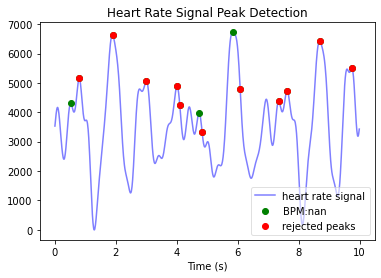

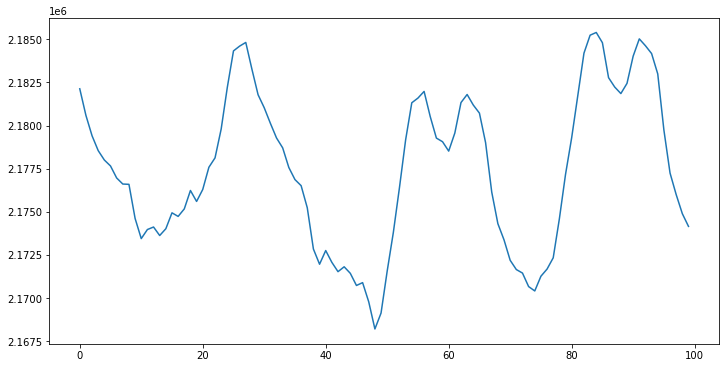

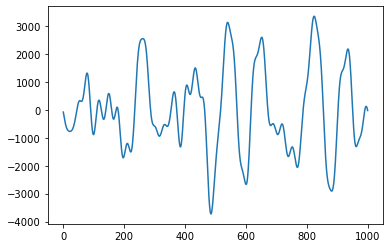

C:\Python38\lib\site-packages\numpy\core\fromnumeric.py:3334: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Python38\lib\site-packages\numpy\core\_methods.py:216: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Python38\lib\site-packages\numpy\ma\core.py:5215: RuntimeWarning: Mean of empty slice.
  result = super(MaskedArray, self).mean(axis=axis,
C:\Python38\lib\site-packages\numpy\core\fromnumeric.py:3583: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Python38\lib\site-packages\heartpy\visualizeutils.py:119: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


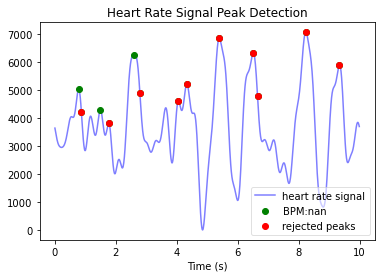

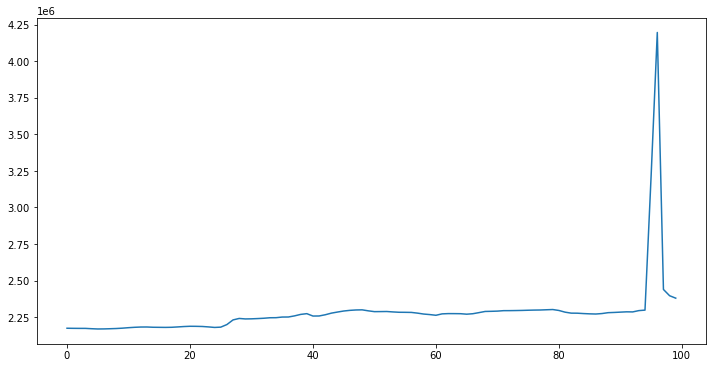

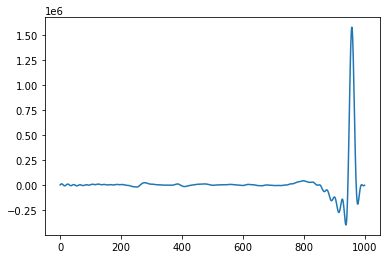

HeartPy couldn't process


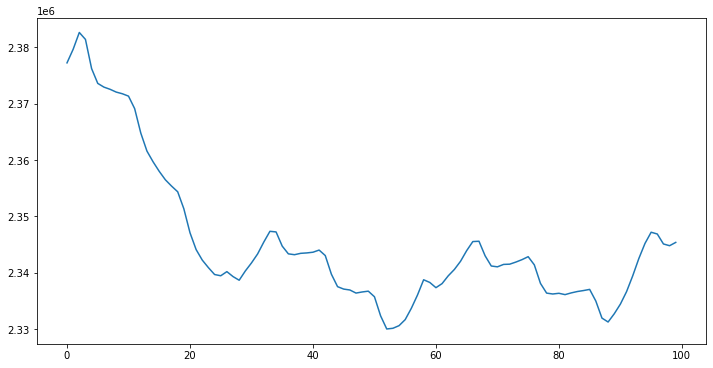

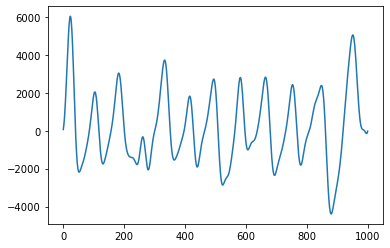

C:\Python38\lib\site-packages\heartpy\visualizeutils.py:119: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


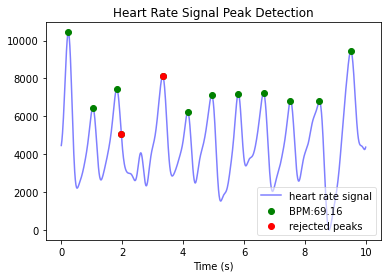

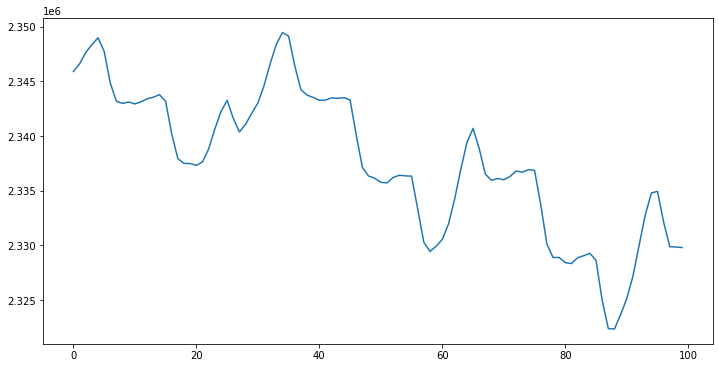

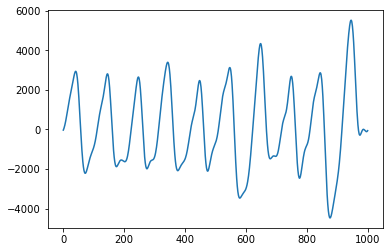

C:\Python38\lib\site-packages\heartpy\visualizeutils.py:119: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


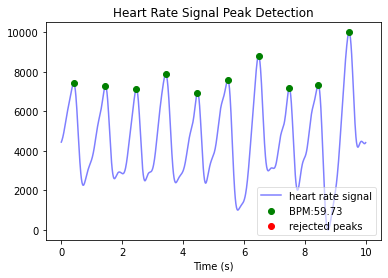

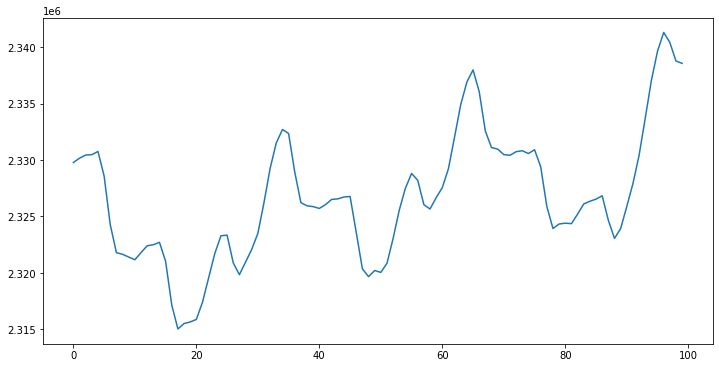

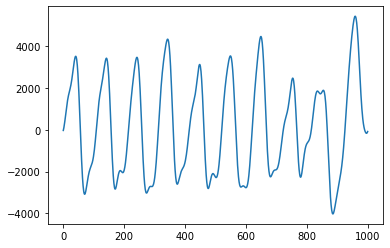

C:\Python38\lib\site-packages\heartpy\visualizeutils.py:119: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


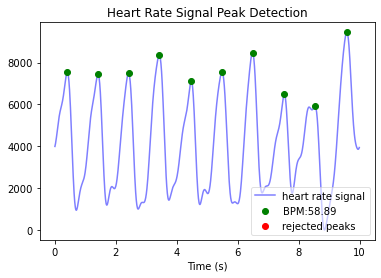

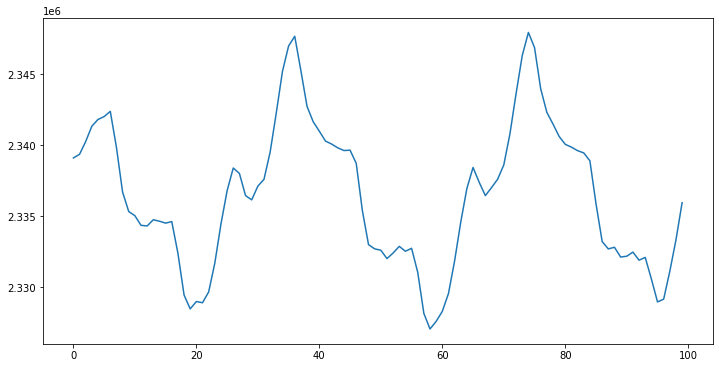

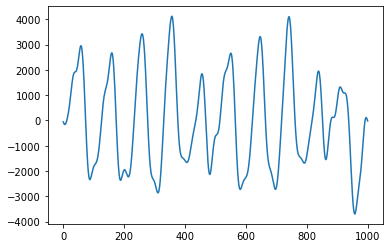

C:\Python38\lib\site-packages\heartpy\visualizeutils.py:119: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


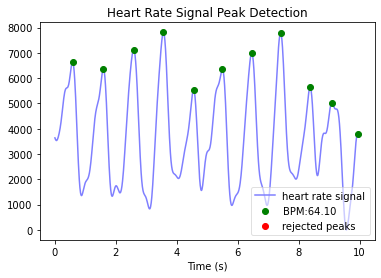

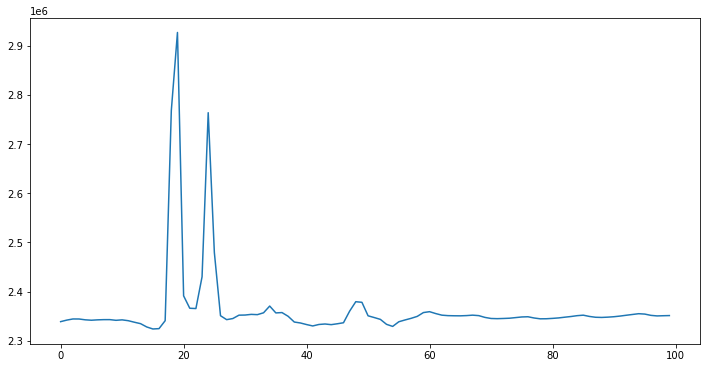

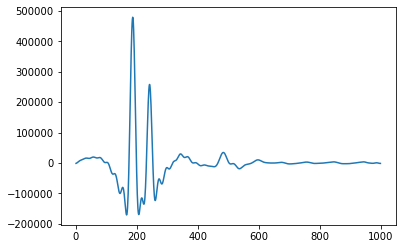

C:\Python38\lib\site-packages\heartpy\visualizeutils.py:119: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


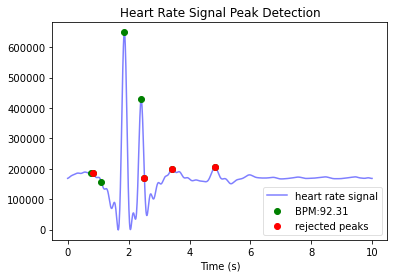

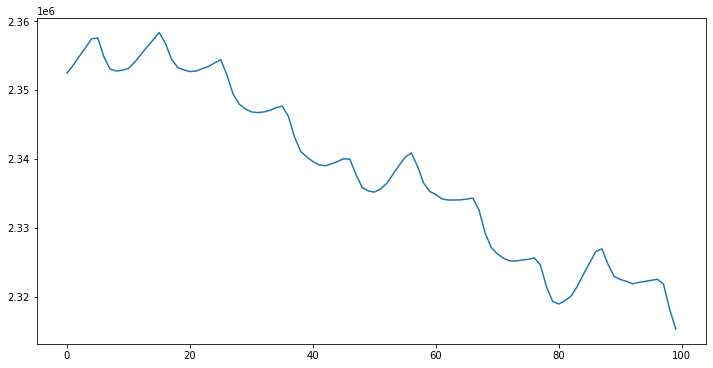

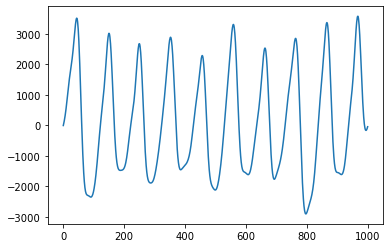

C:\Python38\lib\site-packages\heartpy\visualizeutils.py:119: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


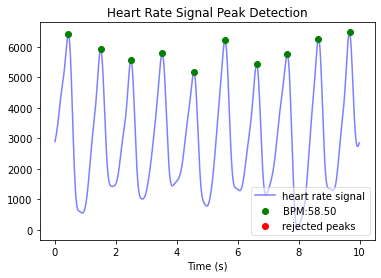

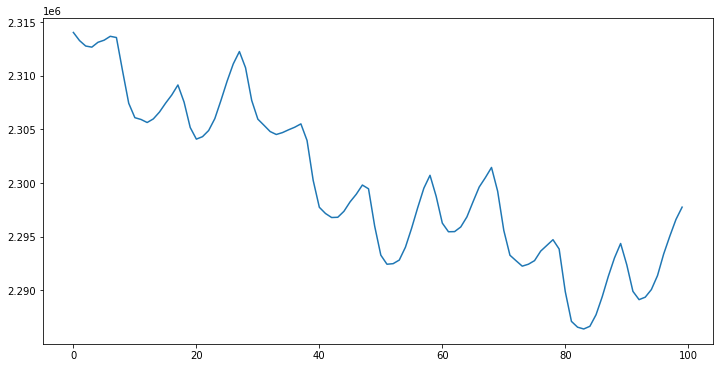

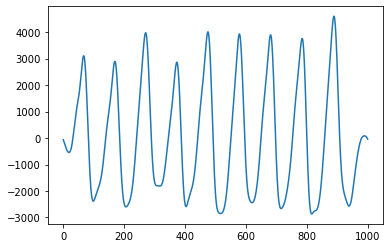

C:\Python38\lib\site-packages\heartpy\visualizeutils.py:119: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


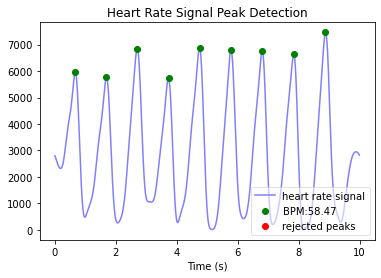

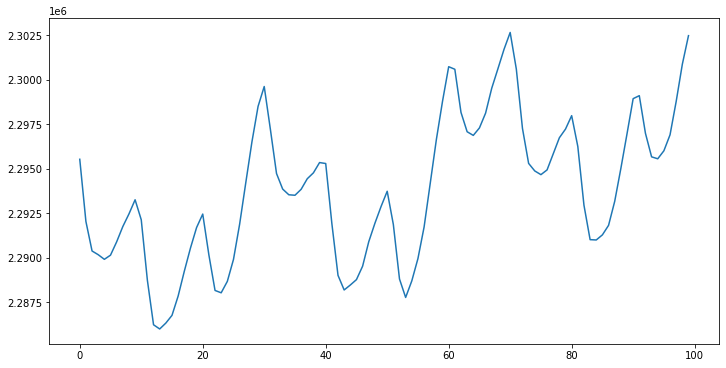

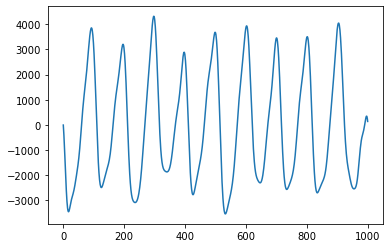

C:\Python38\lib\site-packages\heartpy\visualizeutils.py:119: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


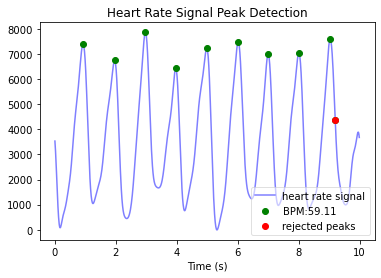

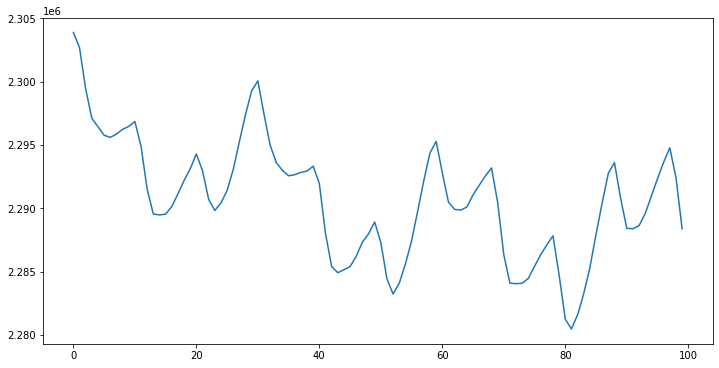

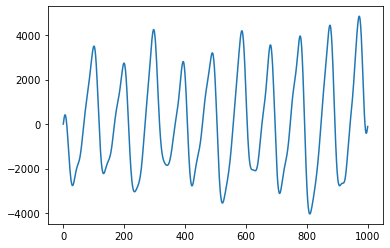

C:\Python38\lib\site-packages\heartpy\visualizeutils.py:119: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


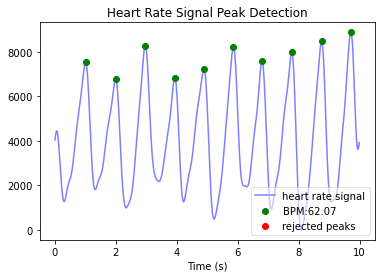

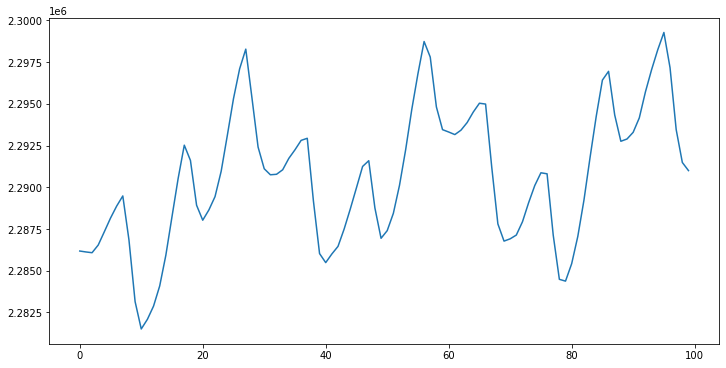

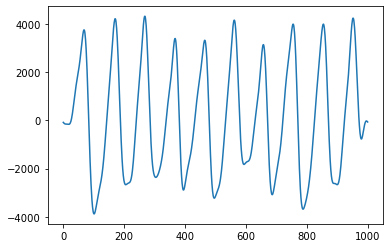

C:\Python38\lib\site-packages\heartpy\visualizeutils.py:119: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


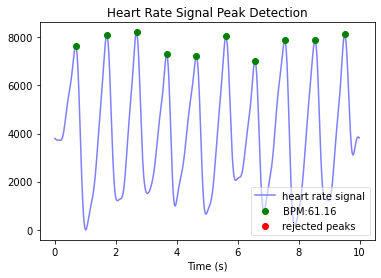

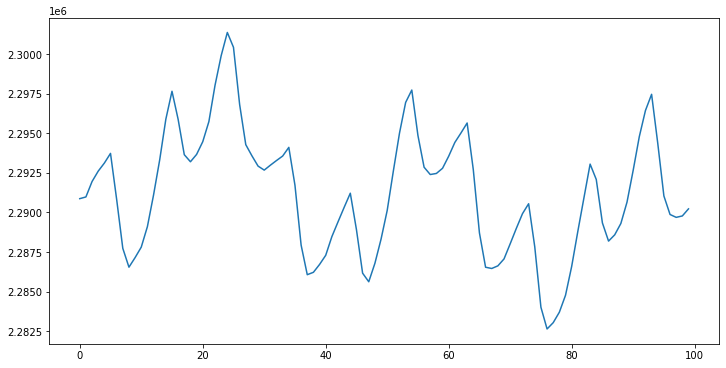

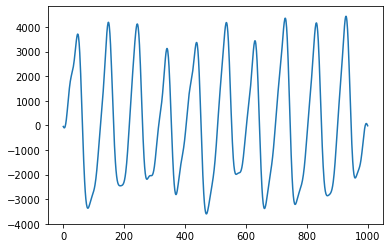

C:\Python38\lib\site-packages\heartpy\visualizeutils.py:119: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


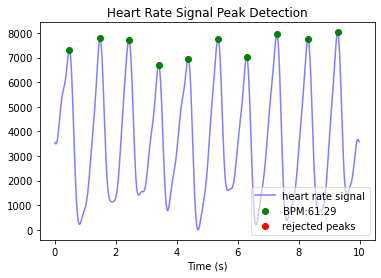

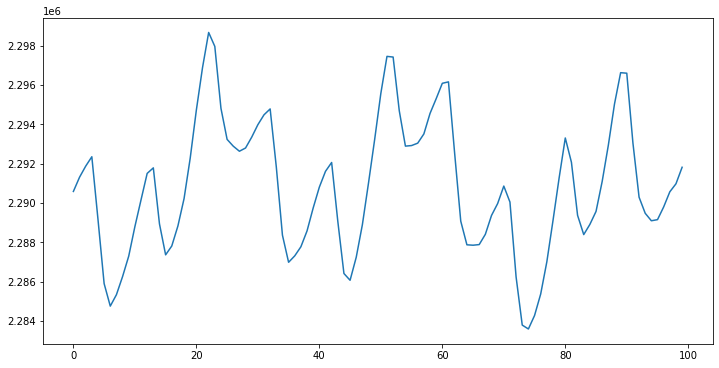

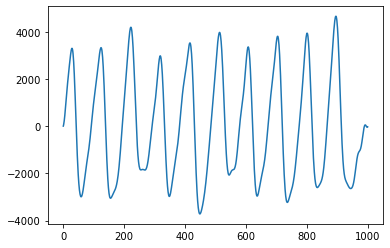

C:\Python38\lib\site-packages\heartpy\visualizeutils.py:119: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


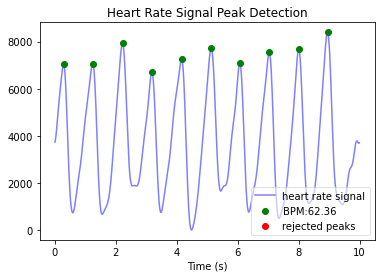

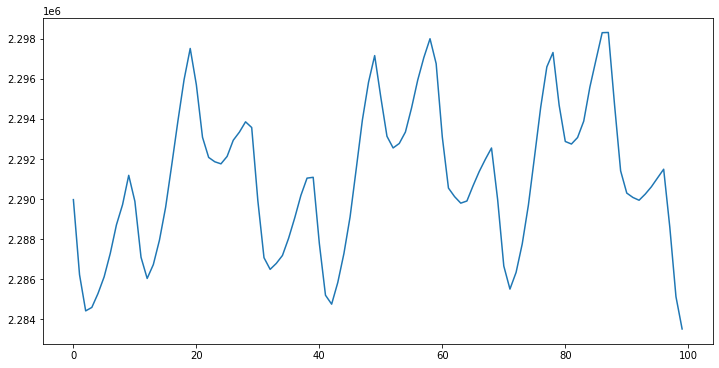

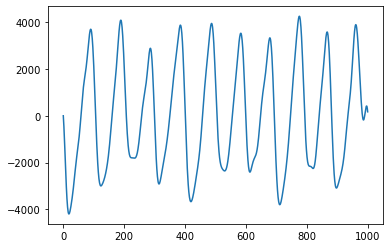

C:\Python38\lib\site-packages\heartpy\visualizeutils.py:119: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


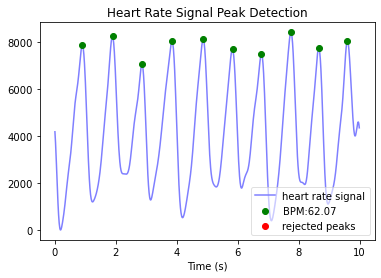

In [147]:
for i in range(len(final_filtered_data)):
    plt.figure(figsize=(12,6))
    plt.plot(final_filtered_data[i])
    plt.show()
    band_filtered = hp.filter_signal(np.array(final_filtered_data[i]), [0.5, 4.00], sample_rate=sample_rate, order=3, filtertype='bandpass')
    freq_enhancer_factor = 10
    resampled = resample(band_filtered, len(band_filtered) * freq_enhancer_factor)
    new_sample_rate = sample_rate * freq_enhancer_factor
    plt.plot(resampled)
    plt.show()
    try:
        wd, m = hp.process(resampled, sample_rate = new_sample_rate)
        hp.plotter(wd, m)
    except:
        print('HeartPy couldn\'t process')

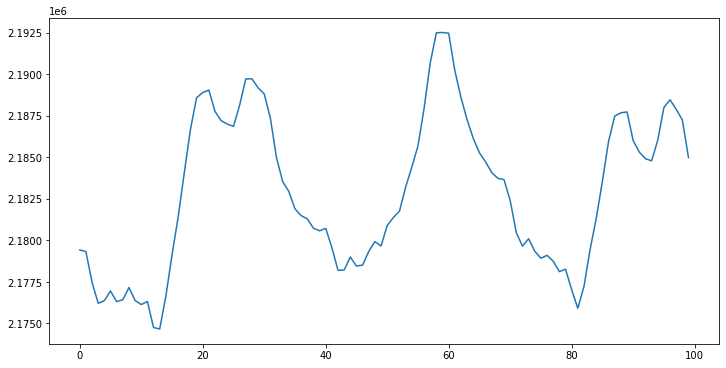

C:\Python38\lib\site-packages\numpy\core\fromnumeric.py:3334: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Python38\lib\site-packages\numpy\core\_methods.py:216: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Python38\lib\site-packages\numpy\ma\core.py:5215: RuntimeWarning: Mean of empty slice.
  result = super(MaskedArray, self).mean(axis=axis,
C:\Python38\lib\site-packages\numpy\core\fromnumeric.py:3583: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Python38\lib\site-packages\heartpy\visualizeutils.py:119: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


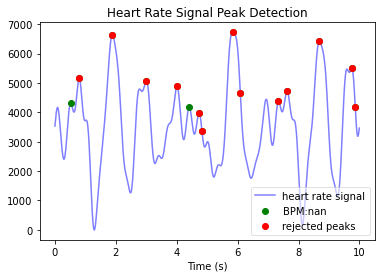

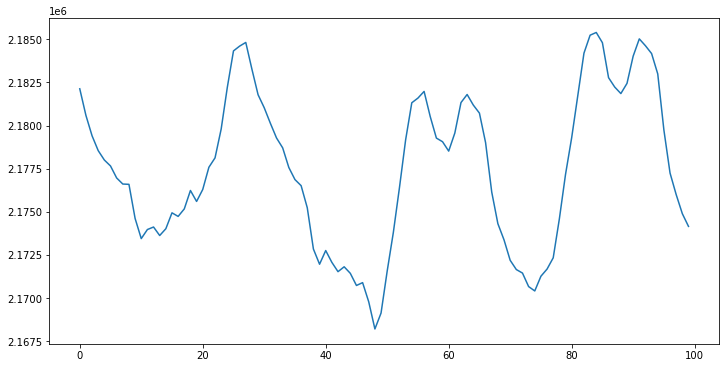

C:\Python38\lib\site-packages\numpy\core\fromnumeric.py:3334: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Python38\lib\site-packages\numpy\core\_methods.py:216: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Python38\lib\site-packages\numpy\ma\core.py:5215: RuntimeWarning: Mean of empty slice.
  result = super(MaskedArray, self).mean(axis=axis,
C:\Python38\lib\site-packages\numpy\core\fromnumeric.py:3583: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Python38\lib\site-packages\heartpy\visualizeutils.py:119: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


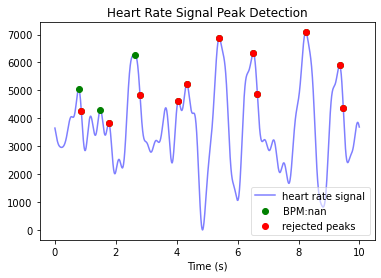

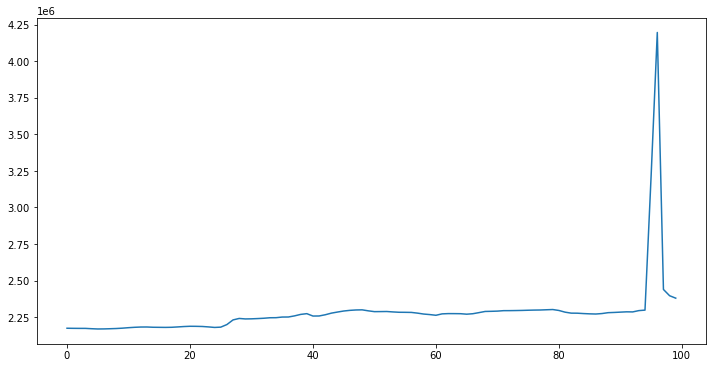

HeartPy couldn't process


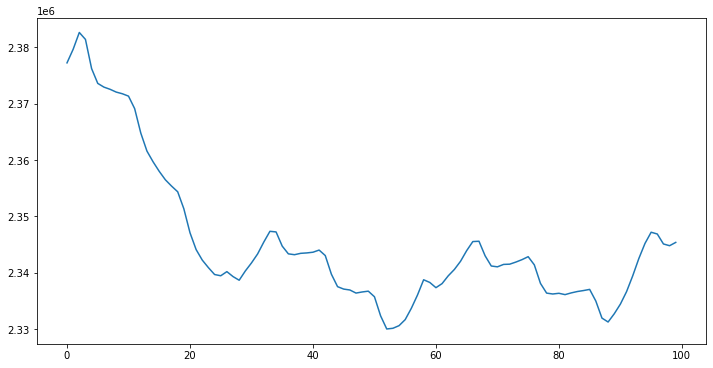

C:\Python38\lib\site-packages\heartpy\visualizeutils.py:119: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


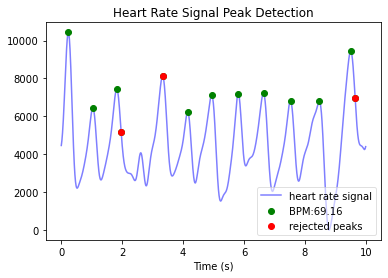

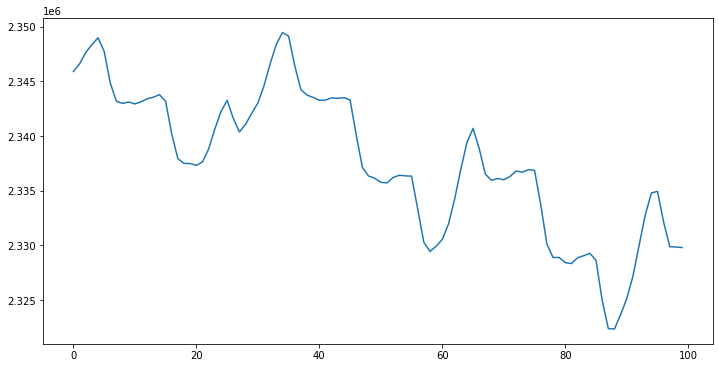

C:\Python38\lib\site-packages\heartpy\visualizeutils.py:119: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


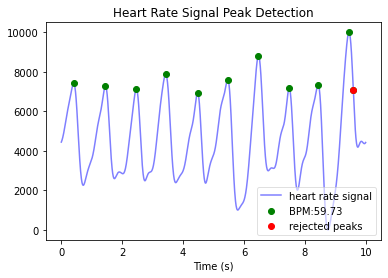

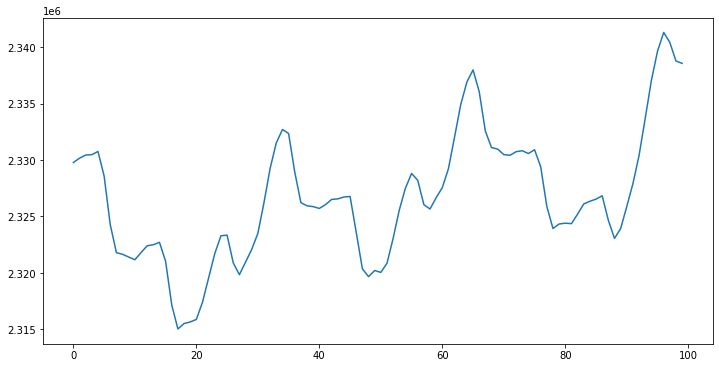

C:\Python38\lib\site-packages\heartpy\visualizeutils.py:119: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


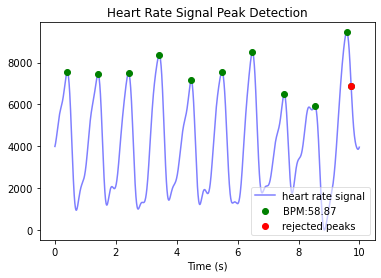

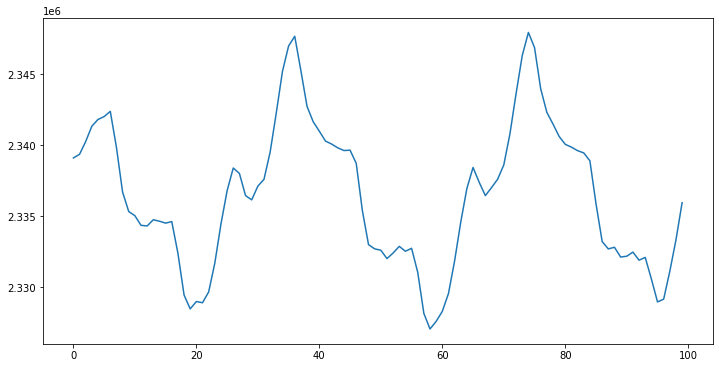

C:\Python38\lib\site-packages\heartpy\visualizeutils.py:119: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


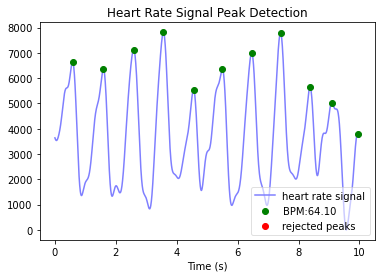

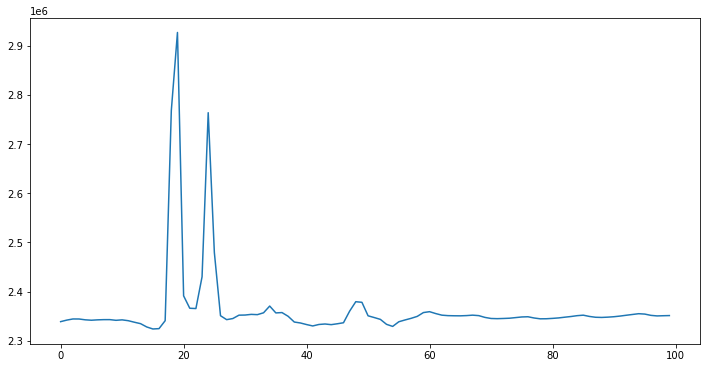

C:\Python38\lib\site-packages\heartpy\visualizeutils.py:119: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


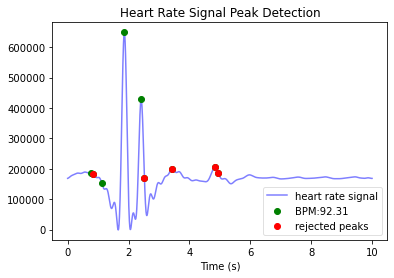

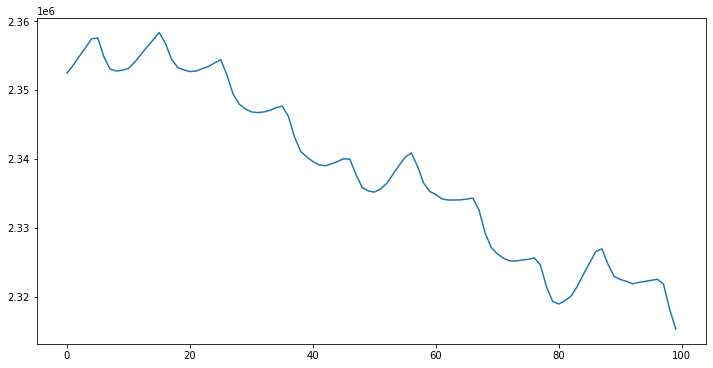

C:\Python38\lib\site-packages\heartpy\visualizeutils.py:119: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


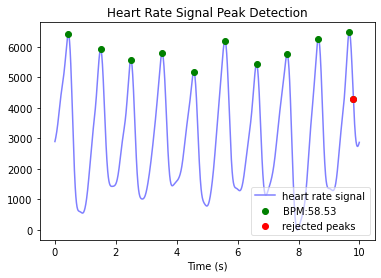

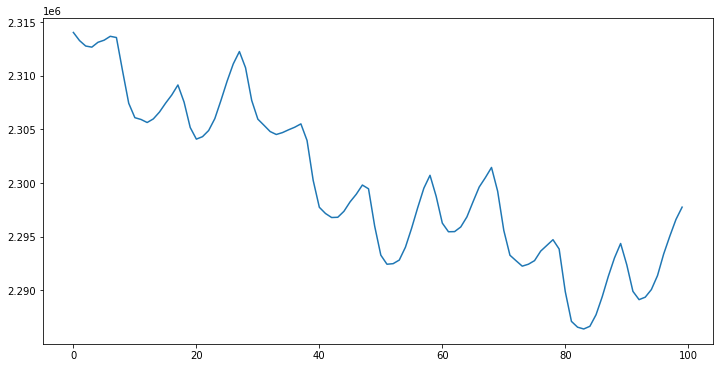

C:\Python38\lib\site-packages\heartpy\visualizeutils.py:119: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


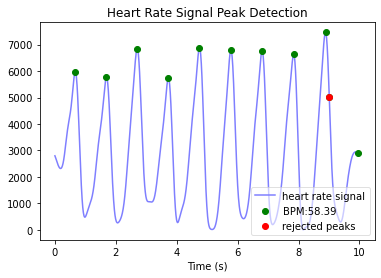

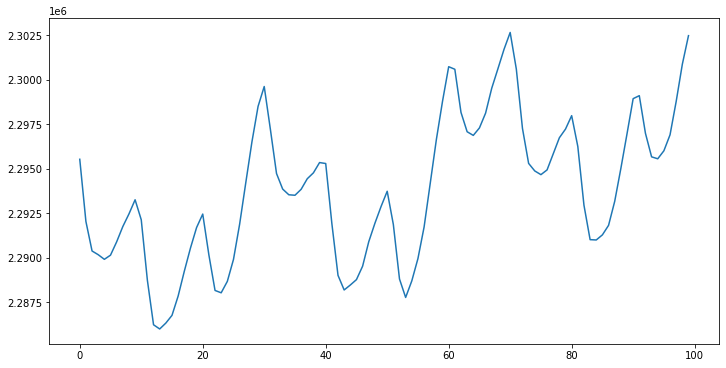

C:\Python38\lib\site-packages\heartpy\visualizeutils.py:119: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


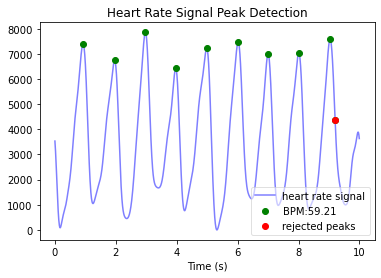

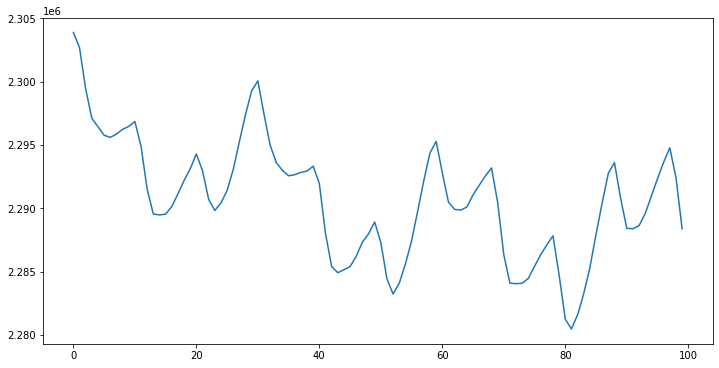

C:\Python38\lib\site-packages\heartpy\visualizeutils.py:119: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


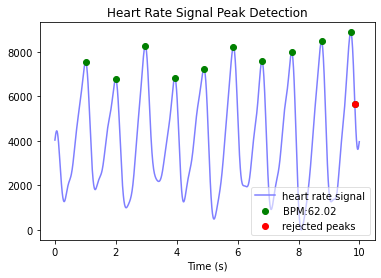

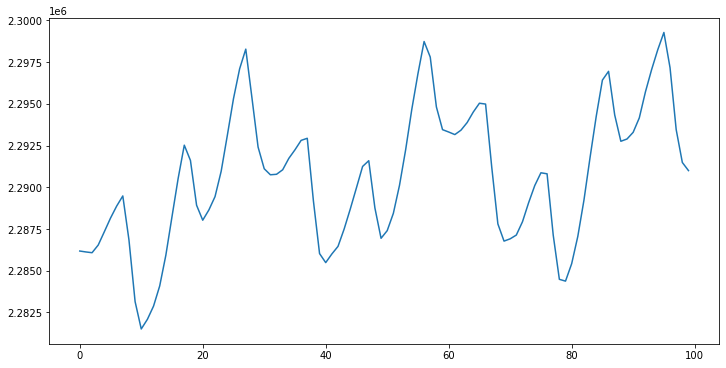

C:\Python38\lib\site-packages\heartpy\visualizeutils.py:119: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


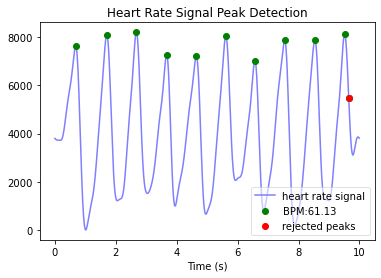

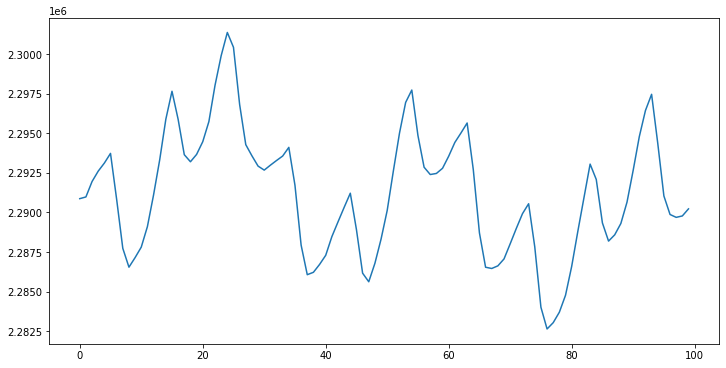

C:\Python38\lib\site-packages\heartpy\visualizeutils.py:119: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


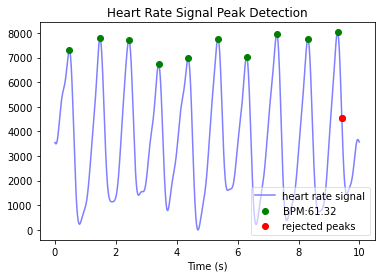

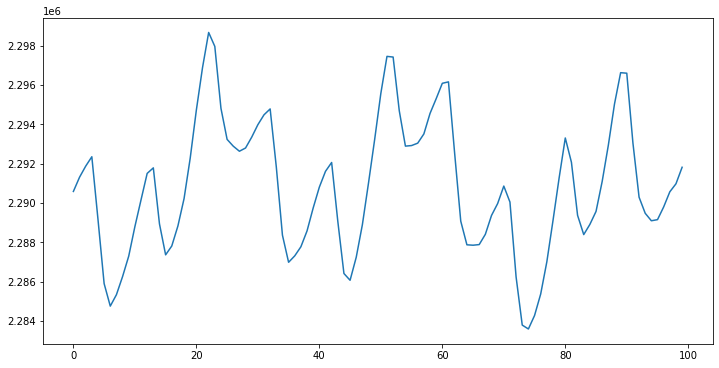

C:\Python38\lib\site-packages\heartpy\visualizeutils.py:119: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


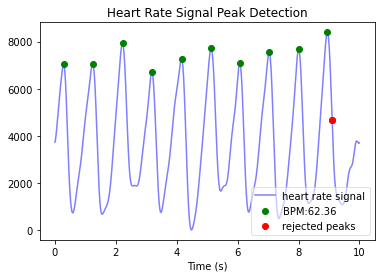

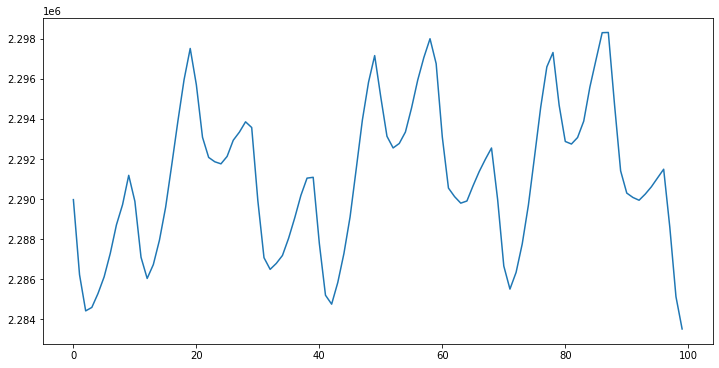

C:\Python38\lib\site-packages\heartpy\visualizeutils.py:119: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


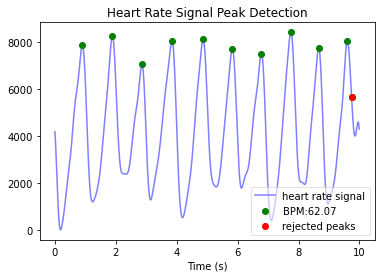

In [144]:
for i in range(len(final_filtered_data)):
    plt.figure(figsize=(12,6))
    plt.plot(final_filtered_data[i])
    plt.show()
    band_filtered = hp.filter_signal(np.array(final_filtered_data[i]), [0.5, 4.00], sample_rate=sample_rate, order=3, filtertype='bandpass')
    freq_enhancer_factor = 15
    resampled = resample(band_filtered, len(band_filtered) * freq_enhancer_factor)
    new_sample_rate = sample_rate * freq_enhancer_factor
    try:
        wd, m = hp.process(resampled, sample_rate = new_sample_rate)
        hp.plotter(wd, m)
    except:
        print('HeartPy couldn\'t process')

C:\Python38\lib\site-packages\heartpy\visualizeutils.py:119: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


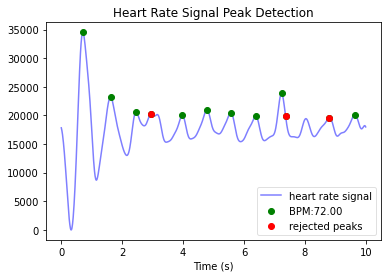

In [86]:
band_filtered = hp.filter_signal(np.array(final_filtered_data[1]), [0.5, 4.00], sample_rate=sample_rate, order=3, filtertype='bandpass')
freq_enhancer_factor = 10
resampled = resample(band_filtered, len(band_filtered) * freq_enhancer_factor)
new_sample_rate = sample_rate * freq_enhancer_factor
wd, m = hp.process(resampled, sample_rate = new_sample_rate)
hp.plotter(wd, m)

In [117]:
print(wd['binary_peaklist'])

[1 0 0 1 0 0 0]


In [119]:
print(len(wd['binary_peaklist']))
np.count_nonzero(wd['binary_peaklist']==1)

7


2

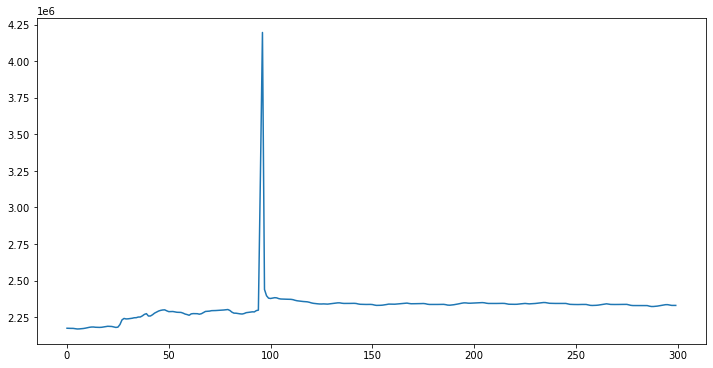

HeartPy couldn't process


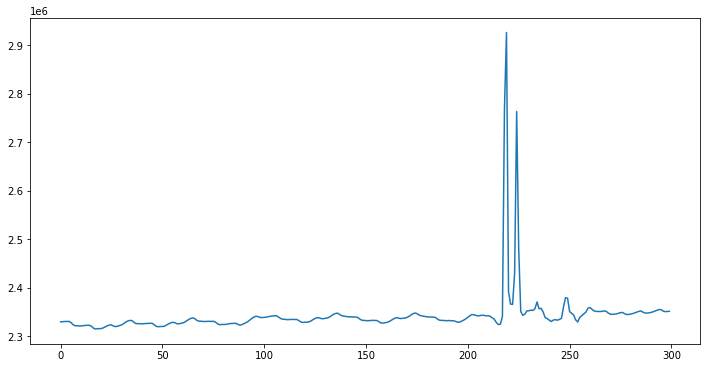

HeartPy couldn't process


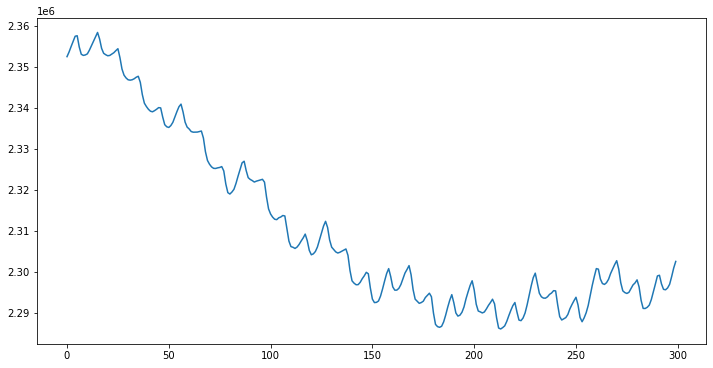

C:\Python38\lib\site-packages\heartpy\visualizeutils.py:119: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


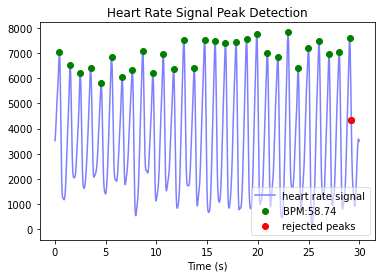

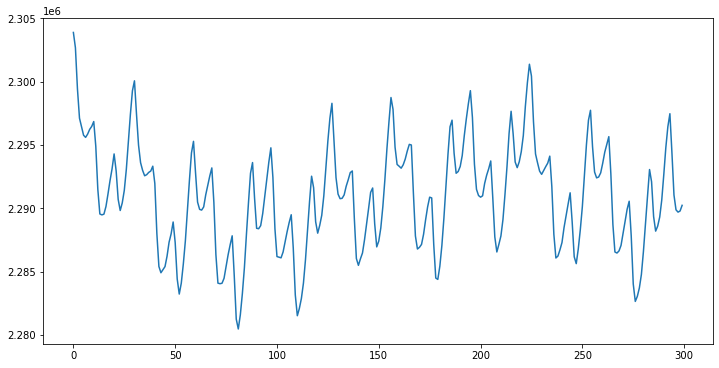

C:\Python38\lib\site-packages\heartpy\visualizeutils.py:119: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


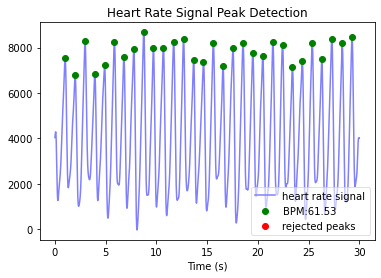

In [129]:
for i in range(len(final_filtered_data)):
    plt.figure(figsize=(12,6))
    plt.plot(final_filtered_data[i])
    plt.show()
    band_filtered = hp.filter_signal(np.array(final_filtered_data[i]), [0.5, 4.00], sample_rate=sample_rate, order=3, filtertype='bandpass')
    freq_enhancer_factor = 10
    resampled = resample(band_filtered, len(band_filtered) * freq_enhancer_factor)
    new_sample_rate = sample_rate * freq_enhancer_factor
    try:
        wd, m = hp.process(resampled, sample_rate = new_sample_rate)
        pos_peak_ratio = np.count_nonzero(wd['binary_peaklist']==1)/(len(wd['binary_peaklist']))
        if(pos_peak_ratio>=0.7):
            hp.plotter(wd, m)
    except:
        print('HeartPy couldn\'t process')